# Linear Regression

In [1]:
# basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression

In [2]:
# helper function to calculate rmse
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

In [3]:
# function to simulate data (in numpy) for regression task
def sim_reg_data(n=25, seed=42):
    np.random.seed(seed)
    x1 = np.random.uniform(low=0, high=5, size=(n,))
    x2 = np.random.uniform(low=4, high=7, size=(n,))
    x1 = np.round(x1, 2)
    x2 = np.round(x2, 2)
    e = np.random.normal(loc=0, scale=1, size=n)
    y = 2 + 3 * x1 + 0.5 * x2 + e
    y = np.round(y, 2)
    X = np.column_stack((x1, x2))
    return X, y

In [4]:
# simulate a train and test set
X_train, y_train = sim_reg_data(n=200, seed=42)
X_test, y_test = sim_reg_data(n=100, seed=307)

In [5]:
# temporarily create df for easy plotting and nice printing
train_df = pd.DataFrame(
    {
        "x1": X_train[:, 0],
        "x2": X_train[:, 1],
        "y": y_train,
    }
)
train_df

,x1,x2,y
0,1.87,5.93,11.88
1,4.75,4.25,18.40
2,3.66,4.48,15.90
3,2.99,6.70,14.01
4,0.78,5.82,7.57
...,...,...,...
195,1.75,6.79,9.81
196,3.63,6.58,16.45
197,4.49,5.29,18.06
198,4.44,6.25,18.21


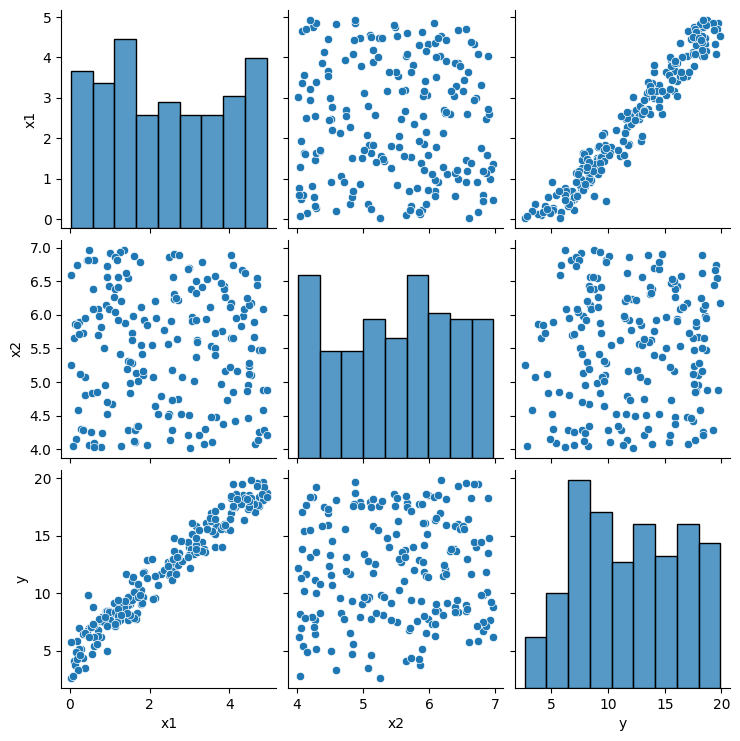

In [6]:
# (quickly) create a "pairs" plot
_ = sns.pairplot(data=train_df)

In [7]:
# instantiate a liner regression
lr = LinearRegression()

# fit linear regression to the train data
_ = lr.fit(X_train, y_train)

In [8]:
# make prediction for first five observations of the test set
lr.predict(X_test[:5])

array([ 9.74686651, 11.38944255, 11.10014178, 18.41619462, 16.27374679])

In [9]:
# access the learned (estimate) coefficients
lr.intercept_, lr.coef_

(2.3227373410822256, array([3.00223949, 0.43968892]))

## Higher Order Terms

In [10]:
# function to simulate data (in numpy) for regression task
def sim_reg_data_higher(n=25, seed=42):
    np.random.seed(seed)
    x1 = np.random.uniform(low=-5, high=5, size=(n,))
    x2 = np.random.uniform(low=0, high=10, size=(n,))
    x1 = np.round(x1, 2)
    x2 = np.round(x2, 2)
    e = np.random.normal(loc=0, scale=1, size=n)
    y = 1 + 1 * x1 + 0.5 * x2 + (x1**2) - 2 * (x1 * x2) + e
    y = np.round(y, 2)
    X = np.column_stack((x1, x2))
    return X, y

In [11]:
# simulate a train and test set
X_train, y_train = sim_reg_data_higher(n=200, seed=1)
X_test, y_test = sim_reg_data_higher(n=100, seed=2)

In [12]:
# temporarily create df for easy plotting and nice printing
train_df = pd.DataFrame(
    {
        "x1": X_train[:, 0],
        "x2": X_train[:, 1],
        "y": y_train,
    }
)
train_df

,x1,x2,y
0,-0.83,9.50,22.03
1,2.20,5.57,-13.73
2,-5.00,9.16,116.45
3,-1.98,6.42,30.71
4,-3.53,3.90,39.28
...,...,...,...
195,4.32,8.44,-44.52
196,-4.86,3.81,58.87
197,-2.66,7.50,47.90
198,1.17,5.11,-5.17


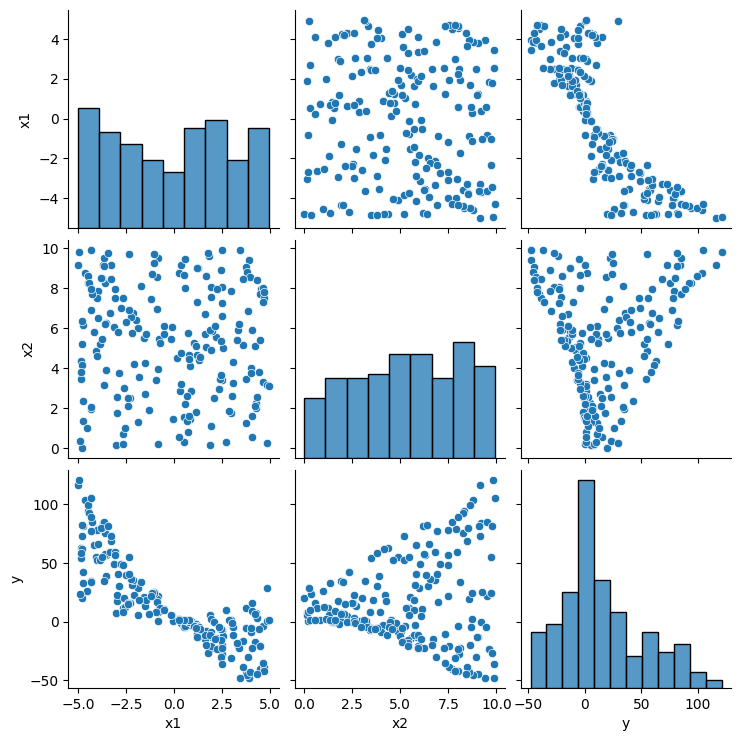

In [13]:
# (quickly) create a "pairs" plot
_ = sns.pairplot(data=train_df)

In [14]:
# learn "polynomial" features (all second-order terms and below, without intercept)
poly = PolynomialFeatures(degree=2, include_bias=False)
_ = poly.fit(X_train)

In [15]:
# temporarily define feature names for original X data
poly.feature_names_in_ = ["x1", "x2"]

In [16]:
# check order of created features
# not that the interaction appears between the two quadratic terms
poly.get_feature_names_out()

array(['x1', 'x2', 'x1^2', 'x1 x2', 'x2^2'], dtype=object)

In [17]:
# remove temporary feature names
poly.feature_names_in_ = None

In [18]:
# preview the transformation
poly.transform(X_train[:5])

array([[ -0.83  ,   9.5   ,   0.6889,  -7.885 ,  90.25  ],
       [  2.2   ,   5.57  ,   4.84  ,  12.254 ,  31.0249],
       [ -5.    ,   9.16  ,  25.    , -45.8   ,  83.9056],
       [ -1.98  ,   6.42  ,   3.9204, -12.7116,  41.2164],
       [ -3.53  ,   3.9   ,  12.4609, -13.767 ,  15.21  ]])

In [19]:
# fit model with additional "higher-order" features
# by default, sklearn adds an intercept term
lrh = LinearRegression()
_ = lrh.fit(poly.transform(X_train), y_train)

In [20]:
# access the learned (estimate) coefficients
lrh.intercept_, lrh.coef_

(0.7155757335097075,
 array([ 0.98203002,  0.61993987,  1.00488342, -1.99189121, -0.01133566]))

In [21]:
print(f"(Initial Model) Train RMSE: {rmse(y_train, lr.predict(X_train)):.3f}")
print(f"(Higher-Order Model) Train RMSE: {rmse(y_train, lrh.predict(poly.transform(X_train))):.3f}")

45.934861320909505
1.0046320997755873


In [22]:
print(f"(Initial Model) Test RMSE: {rmse(y_test, lr.predict(X_test)):.3f}")
print(f"(Higher-Order Model) Test RMSE: {rmse(y_test, lrh.predict(poly.transform(X_test))):.3f}")

33.51791466755033
1.0423526305063775


## Generic Feature Transformations

In [35]:
# function to simulate data (in numpy) for regression task
def sim_sin_data(n=25, seed=42):
    X = np.random.uniform(low=-2 * np.pi, high=2 * np.pi, size=(n, 1))
    e = np.random.normal(loc=0, scale=0.25, size=(n, 1))
    y = np.sin(X) + e
    return X, y

In [36]:
# simulate a train and test set
X_train, y_train = sim_sin_data(n=200, seed=42)
X_test, y_test = sim_sin_data(n=100, seed=307)

In [37]:
# fit a linear regression without any transformation
_ = lr.fit(X_train, y_train)

In [38]:
print(f"Test RMSE: {rmse(y_test, lr.predict(X_test)):.3f}")

Test RMSE: 0.702


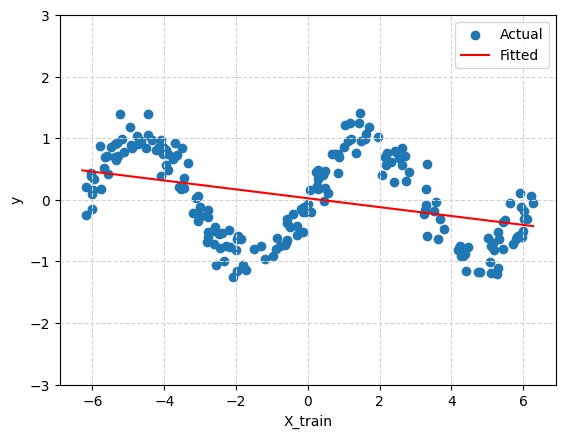

In [39]:
# plot learned regression (without transformed features)
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))
plt.scatter(X_train, y_train, label="Actual")
plt.plot(x_plot, lr.predict(x_plot), color="red", label="Fitted")
plt.xlabel("X_train")
plt.ylabel("y")
plt.ylim(-3, 3)
plt.grid(color="lightgrey", linestyle="--")
plt.legend()
plt.show()

In [40]:
# create a custom transformer which will apply the sin function
sin_transformer = FunctionTransformer(np.sin)

In [41]:
# fit the transformer
_ = sin_transformer.fit(X_train)

In [42]:
# fit a linear regression with the transformed feature data
_ = lr.fit(sin_transformer.transform(X_train), y_train)

In [43]:
print(f"Test RMSE: {rmse(y_test, lr.predict(sin_transformer.transform(X_test))):.3f}")

Test RMSE: 0.241


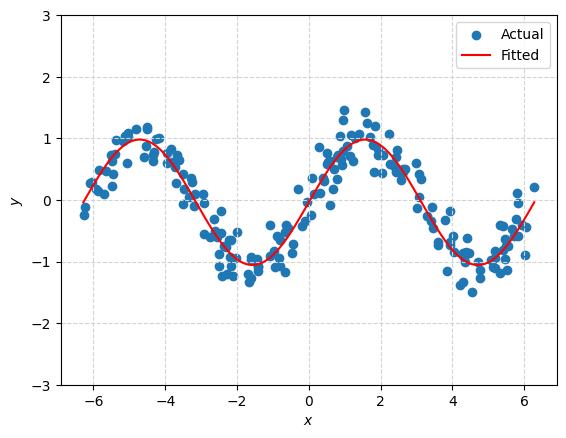

In [32]:
# plot learned regression (with transformed features)
x_plot = np.linspace(-2 * np.pi, 2 * np.pi, 1000).reshape((1000, 1))
plt.scatter(X_train, y_train, label="Actual")
plt.plot(x_plot, lr.predict(sin_transformer.transform(x_plot)), color="red", label="Fitted")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.ylim(-3, 3)
plt.grid(color="lightgrey", linestyle="--")
plt.legend()
plt.show()